In [128]:
import numpy as num
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
HI_SFR = fits.open("HI_SFR", memmap=True)

In [130]:
HI_SFR.info()

Filename: HI_SFR
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7246,)   uint8   
  1  Joined        1 BinTableHDU    246   2992R x 117C   [K, K, 12A, 10A, K, 4A, 20A, L, E, E, E, E, K, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, 8A, 8A, 8A, 8A, K, K, 14A, 14A, 14A, 14A, 14A, 14A, 10A, E, 15A, 10A, K, E, 4E, 4E, E, E, 3E, 3E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 46E, 46E, 46E, 46E, 46E, E, E, 11A, 9A, D, D, E, 79A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [131]:
print(HI_SFR[1].columns)

ColDefs(
    name = 'PLATE'; format = 'K'
    name = 'IFUDESIGN'; format = 'K'
    name = 'PLATEIFU_1'; format = '12A'
    name = 'MANGAID_1'; format = '10A'
    name = 'DRPALLINDX'; format = 'K'
    name = 'MODE'; format = '4A'
    name = 'DAPTYPE'; format = '20A'
    name = 'DAPDONE'; format = 'L'
    name = 'OBJRA_1'; format = 'E'
    name = 'OBJDEC_1'; format = 'E'
    name = 'IFURA'; format = 'E'
    name = 'IFUDEC'; format = 'E'
    name = 'MNGTARG1'; format = 'K'
    name = 'MNGTARG2'; format = 'K'
    name = 'MNGTARG3'; format = 'K'
    name = 'Z'; format = 'E'
    name = 'LDIST_Z'; format = 'E'
    name = 'ADIST_Z'; format = 'E'
    name = 'NSA_Z'; format = 'E'
    name = 'NSA_ZDIST'; format = 'E'
    name = 'LDIST_NSA_Z'; format = 'E'
    name = 'ADIST_NSA_Z'; format = 'E'
    name = 'NSA_ELPETRO_BA'; format = 'E'
    name = 'NSA_ELPETRO_PHI'; format = 'E'
    name = 'NSA_ELPETRO_TH50_R'; format = 'E'
    name = 'NSA_SERSIC_BA'; format = 'E'
    name = 'NSA_SERSIC_PHI'; forma

In [132]:
HI_SFR_Table = Table(HI_SFR[1].data)

In [133]:
HI_SFR_Table

PLATE,IFUDESIGN,PLATEIFU_1,MANGAID_1,DRPALLINDX,MODE,DAPTYPE,DAPDONE,OBJRA_1,OBJDEC_1,IFURA,IFUDEC,MNGTARG1,MNGTARG2,MNGTARG3,Z,LDIST_Z,ADIST_Z,NSA_Z,NSA_ZDIST,LDIST_NSA_Z,ADIST_NSA_Z,NSA_ELPETRO_BA,NSA_ELPETRO_PHI,NSA_ELPETRO_TH50_R,NSA_SERSIC_BA,NSA_SERSIC_PHI,NSA_SERSIC_TH50,NSA_SERSIC_N,VERSDRP2,VERSDRP3,VERSCORE,VERSUTIL,VERSDAP,DRP3QUAL,DAPQUAL,RDXQAKEY,BINKEY,SCKEY,ELMKEY,ELFKEY,SIKEY,BINTYPE,BINSNR,TPLKEY,DATEDAP,DAPBINS,RCOV90,SNR_MED [4],SNR_RING [4],SB_1RE,BIN_RMAX,BIN_R_N [3],BIN_R_SNR [3],STELLAR_Z,STELLAR_VEL_LO,STELLAR_VEL_HI,STELLAR_VEL_LO_CLIP,STELLAR_VEL_HI_CLIP,STELLAR_SIGMA_1RE,STELLAR_CONT_RCHI2_1RE,HA_Z,HA_GVEL_LO,HA_GVEL_HI,HA_GVEL_LO_CLIP,HA_GVEL_HI_CLIP,HA_GSIGMA_1RE,HA_GSIGMA_HI,HA_GSIGMA_HI_CLIP,EMLINE_SFLUX_CEN [22],EMLINE_SFLUX_1RE [22],EMLINE_SFLUX_TOT [22],EMLINE_SSB_1RE [22],EMLINE_SSB_PEAK [22],EMLINE_SEW_1RE [22],EMLINE_SEW_PEAK [22],EMLINE_GFLUX_CEN [22],EMLINE_GFLUX_1RE [22],EMLINE_GFLUX_TOT [22],EMLINE_GSB_1RE [22],EMLINE_GSB_PEAK [22],EMLINE_GEW_1RE [22],EMLINE_GEW_PEAK [22],SPECINDEX_LO [46],SPECINDEX_HI [46],SPECINDEX_LO_CLIP [46],SPECINDEX_HI_CLIP [46],SPECINDEX_1RE [46],SFR_1RE,SFR_TOT,PLATEIFU_2,MANGAID_2,OBJRA_2,OBJDEC_2,VOPT,SESSION,EXP,RMS,LOGHILIM200KMS,PEAK,SNR,FHI,EFHI,LOGMHI,VHI,EV,WM50,WP50,WP20,W2P50,WF50,PR,PL,AR,BR,AL,BL
int64,int64,str12,str10,int64,str4,str20,bool,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str8,str8,str8,str8,int64,int64,str14,str14,str14,str14,str14,str14,str10,float32,str15,str10,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str11,str9,float64,float64,float32,str79,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
7443,1901,7443-1901,12-84620,3590,CUBE,VOR10-GAU-MILESHC,True,231.0426,42.06872,231.0426,42.06872,1170,0,0,0.0187596,57.05211,54.97032,0.0187596,0.0192718,57.05211,54.97032,0.821508,68.4571,3.77785,0.755584,70.8619,4.07204,2.18439,v2_4_3,v2_4_3,v1_6_2,v5_5_32,2.2.1,0,0,SNRG,VOR10,GAU-MILESHC,EMOMM,EFITM,INDXEN,voronoi,10.0,MILESHC,2018-07-22,285,5.139017,10.374874 .. 10.544022,39.459602 .. 24.563507,0.4510729,1.8153713,151.0 .. 23.0,26.640457 .. 6.809965,0.018760908,-45.762894,57.178535,-45.795753,50.75654,55.2375,1.2484871,0.018760847,-42.970913,32.93186,-42.970913,32.93186,39.82803,57.269886,51.423687,394.17834 .. 80.10422,1456.3007 .. 285.008,1769.7047 .. 348.54822,9.644375 .. 1.8874701,24.30806 .. 4.7342467,26.290638 .. 4.3349285,43.86556 .. 8.359218,163.31873 .. 81.9189,599.98364 .. 289.80682,727.84766 .. 353.22028,3.9734015 .. 1.9192505,10.106485 .. 4.840775,10.746245 .. 4.407545,19.05313 .. 8.238495,-0.122679114 .. 0.901748,-0.03284198 .. 1.044389,-0.12064013 .. 0.9083096,-0.03681758 .. 1.0444037,-0.09414587 .. 1.0035086,0.03705121,0.0440793,7443-1901,12-84620,231.0426098,42.06872063,5624.0,16A-16,896.7,1.5120001,-999.0,4.5480003,3.0,0.36,-999.0,8.7391815,5560.0,91.36,161.0,158.0,162.0,159.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
7443,1902,7443-1902,12-49536,4162,CUBE,VOR10-GAU-MILESHC,True,231.9911,42.971207,231.9911,42.971207,1554,0,0,0.0189259,57.565075,55.446465,0.0189259,0.019434,57.565075,55.446465,0.483014,163.621,5.70501,0.3686,7.79376,4.32771,2.75541,v2_4_3,v2_4_3,v1_6_2,v5_5_32,2.2.1,0,0,SNRG,VOR10,GAU-MILESHC,EMOMM,EFITM,INDXEN,voronoi,10.0,MILESHC,2018-07-22,314,5.355226,12.739592 .. 15.453604,39.60812 .. 35.649,0.46809328,1.9661245,187.0 .. 30.0,30.276323 .. 9.3084,0.018887836,-52.915756,34.033573,-52.915756,34.033573,49.753647,1.1191082,0.018838761,-648.7302,724.0842,-328.20148

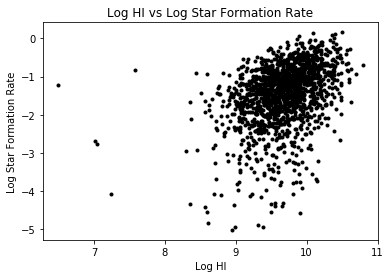

In [134]:
plt.xlabel("Log HI")
plt.ylabel("Log Star Formation Rate")
plt.title("Log HI vs Log Star Formation Rate")
for i in range(2992):
    SFR = num.array(HI_SFR_Table[i]['SFR_1RE'])
    MHI = num.array(HI_SFR_Table[i]['LOGMHI'])
    if MHI > 0 and SFR > 0:
        plt.plot(MHI, math.log10(SFR), "k.")
plt.show()